In [5]:
import networkx as nx
import random
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [3]:
def load_graph_from_file(file_path):
    edges = []
    with open(file_path, 'r') as file:
        for line in file:
            u, v = map(int, line.strip().split())
            edges.append((u, v))
    return edges

# Zad 1

In [24]:
def analyze_graph(file_path):
    # Load edges from the file
    edges = load_graph_from_file(file_path)
    
    # Original Graph Analysis
    G = nx.Graph()
    G.add_edges_from(edges)
    original_order = G.number_of_nodes()
    original_size = G.number_of_edges()
    
    # Remove self-loops and duplicates
    unique_edges = {(min(u, v), max(u, v)) for u, v in edges if u != v}
    
    # Cleaned Graph Analysis
    G_cleaned = nx.Graph()
    G_cleaned.add_edges_from(unique_edges)
    cleaned_order = G_cleaned.number_of_nodes()
    cleaned_size = G_cleaned.number_of_edges()
    
    # Print results
    print("Original Graph:")
    print(f"Order (Number of Nodes): {original_order}")
    print(f"Size (Number of Edges): {original_size}")
    print("\nCleaned Graph:")
    print(f"Order (Number of Nodes): {cleaned_order}")
    print(f"Size (Number of Edges): {cleaned_size}")

analyze_graph('data.txt')


Original Graph:
Order (Number of Nodes): 37700
Size (Number of Edges): 289003

Cleaned Graph:
Order (Number of Nodes): 37700
Size (Number of Edges): 289003


# Zad 2

In [25]:
def analyze_graph_connectivity(file_path):
    # Load edges from the file
    edges = load_graph_from_file(file_path)
    
    # Create graph, removing self-loops and duplicates
    unique_edges = {(min(u, v), max(u, v)) for u, v in edges if u != v}
    
    # Build the graph with unique edges
    G = nx.Graph()
    G.add_edges_from(unique_edges)
    
    # Check if the graph is connected
    is_connected = nx.is_connected(G) if G.number_of_nodes() > 0 else False
    
    # Print connectivity status
    if is_connected:
        print("The graph is connected.")
    else:
        print("The graph is not connected.")
        # If not connected, find and analyze the largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        G_largest_cc = G.subgraph(largest_cc).copy()
        largest_cc_order = G_largest_cc.number_of_nodes()
        largest_cc_size = G_largest_cc.number_of_edges()
        
        print("\nLargest Connected Component:")
        print(f"Order (Number of Nodes): {largest_cc_order}")
        print(f"Size (Number of Edges): {largest_cc_size}")

analyze_graph_connectivity('data.txt')

The graph is connected.


# Zad 3

In [26]:
def prepare_graph(file_path):
    # Load edges and remove self-loops and duplicates
    edges = load_graph_from_file(file_path)
    unique_edges = {(min(u, v), max(u, v)) for u, v in edges if u != v}
    
    # Build the graph
    G = nx.Graph()
    G.add_edges_from(unique_edges)
    
    # Extract the largest connected component
    if not nx.is_connected(G):
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()
    
    return G

def approximate_average_path_length(G, sample_size):
    # Ensure the sample size does not exceed the total possible pairs
    nodes = list(G.nodes())
    max_possible_pairs = len(nodes) * (len(nodes) - 1) // 2
    sample_size = min(sample_size, max_possible_pairs)
    
    # Sample random pairs of nodes
    sampled_pairs = [(nodes[random.randint(0, len(nodes) - 1)], nodes[random.randint(0, len(nodes) - 1)]) for _ in range(sample_size)]
    
    # Calculate shortest path lengths for sampled pairs
    path_lengths = []
    for u, v in sampled_pairs:
        try:
            path_length = nx.shortest_path_length(G, source=u, target=v)
            path_lengths.append(path_length)
        except nx.NetworkXNoPath:
            # If there is no path, ignore the pair (shouldn't happen in largest connected component)
            continue
    
    # Calculate the average path length from sampled paths
    if path_lengths:
        return sum(path_lengths) / len(path_lengths)
    else:
        return float('inf')  # If no paths found (unlikely if the graph is large)

def analyze_path_length(file_path):
    G = prepare_graph(file_path)
    
    # Analyze average path length with different sample sizes
    for sample_size in [100, 1000, 10000]:
        avg_path_length = approximate_average_path_length(G, sample_size)
        print(f"Approximate Average Path Length with {sample_size} samples: {avg_path_length}")

analyze_path_length('data.txt')

Approximate Average Path Length with 100 samples: 3.23
Approximate Average Path Length with 1000 samples: 3.237
Approximate Average Path Length with 10000 samples: 3.2439


# Zad 4

In [17]:
def analyze_cores(file_path):
    # Load edges and remove self-loops and duplicates
    edges = load_graph_from_file(file_path)
    unique_edges = {(min(u, v), max(u, v)) for u, v in edges if u != v}
    
    # Build the graph
    G = nx.Graph()
    G.add_edges_from(unique_edges)
    
    # Compute core numbers for each node
    core_numbers = nx.core_number(G)
    counts = Counter(core_numbers.values()).most_common(3)
    print("Core Analysis:")
    print(f"Largest Core Level: {counts[0][0]}, Number of Nodes: {counts[0][1]}")
    print(f"2nd Largest Core Level: {counts[1][0]}, Number of Nodes: {counts[1][1]}")
    print(f"3rd Largest Core Level: {counts[2][0]}, Number of Nodes: {counts[2][1]}")

analyze_cores('data.txt')

Core Analysis:
Largest Core Level: 1, Number of Nodes: 5236
2nd Largest Core Level: 2, Number of Nodes: 4916
3rd Largest Core Level: 3, Number of Nodes: 3945


# Zad 5

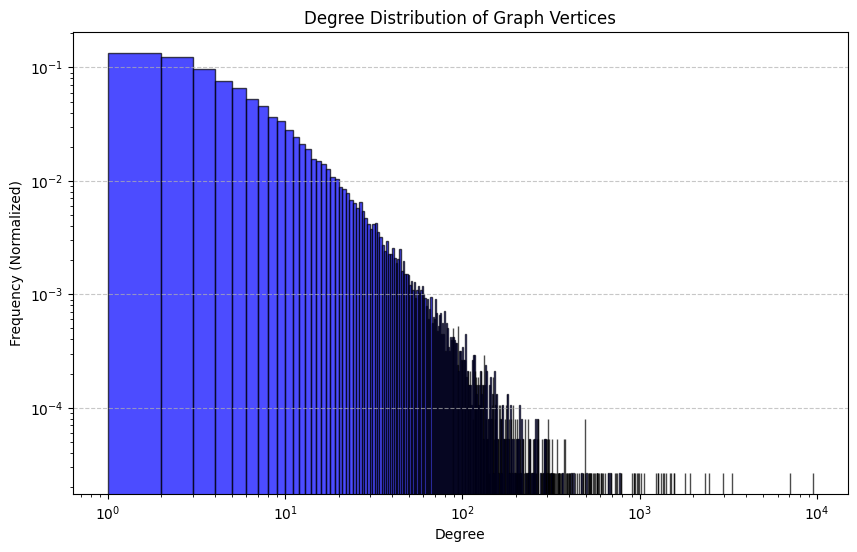

In [22]:
def prepare_graph(file_path):
    # Load edges and remove self-loops and duplicates
    edges = load_graph_from_file(file_path)
    unique_edges = {(min(u, v), max(u, v)) for u, v in edges if u != v}
    
    # Build the graph
    G = nx.Graph()
    G.add_edges_from(unique_edges)
    
    # Extract the largest connected component
    if not nx.is_connected(G):
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()
    
    return G

def plot_degree_distribution(file_path):
    G = prepare_graph(file_path)
    
    # Calculate degrees of each vertex
    degrees = [deg for _, deg in G.degree()]
    
    # Plot degree distribution
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=True, alpha=0.7, color='b', edgecolor='black')
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree")
    plt.ylabel("Frequency (Normalized)")
    plt.title("Degree Distribution of Graph Vertices")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Replace 'data.txt' with the path to your file
plot_degree_distribution('data.txt')

# Zad 6

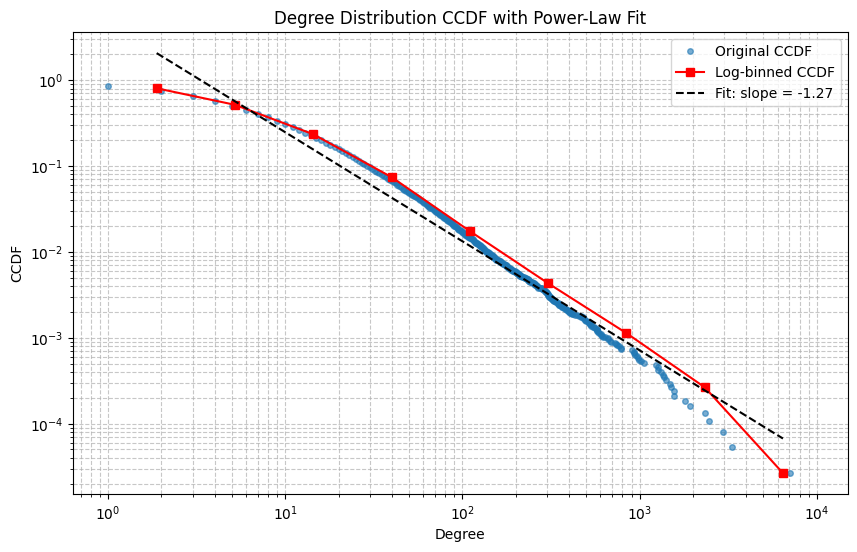

Estimated power-law exponent (slope): -1.27
R-squared of the fit: 0.975


In [8]:
def prepare_graph(file_path):
    # Load edges and remove self-loops and duplicates
    edges = load_graph_from_file(file_path)
    unique_edges = {(min(u, v), max(u, v)) for u, v in edges if u != v}
    
    # Build the graph
    G = nx.Graph()
    G.add_edges_from(unique_edges)
    
    # Extract the largest connected component
    if not nx.is_connected(G):
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()
    
    return G

def calculate_ccdf(degrees):
    # Calculate frequency of each degree
    degree_counts = np.bincount(degrees)
    nonzero_degrees = np.arange(len(degree_counts))[degree_counts > 0]
    ccdf = 1.0 - np.cumsum(degree_counts[degree_counts > 0]) / len(degrees)
    return nonzero_degrees, ccdf

def log_binned_ccdf(nonzero_degrees, ccdf, num_bins=10):
    # Logarithmic binning
    log_bins = np.logspace(np.log10(min(nonzero_degrees)), np.log10(max(nonzero_degrees)), num_bins)
    bin_centers = (log_bins[:-1] + log_bins[1:]) / 2
    binned_ccdf = []

    for i in range(len(log_bins) - 1):
        mask = (nonzero_degrees >= log_bins[i]) & (nonzero_degrees < log_bins[i + 1])
        if np.any(mask):
            binned_ccdf.append(np.mean(ccdf[mask]))

    return bin_centers, np.array(binned_ccdf)

def estimate_power_law_exponent(file_path):
    G = prepare_graph(file_path)
    
    # Calculate the degree of each node and generate CCDF
    degrees = [deg for _, deg in G.degree()]
    nonzero_degrees, ccdf = calculate_ccdf(degrees)
    
    # Logarithmic binning
    bin_centers, binned_ccdf = log_binned_ccdf(nonzero_degrees, ccdf)
    
    # Perform log-log regression
    log_bin_centers = np.log10(bin_centers)
    log_binned_ccdf_y = np.log10(binned_ccdf)
    
    # Linear regression to find the slope, which is the power-law exponent
    slope, intercept, r_value, p_value, std_err = linregress(log_bin_centers, log_binned_ccdf_y)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(nonzero_degrees, ccdf, 'o', markersize=4, alpha=0.6, label='Original CCDF')
    plt.plot(bin_centers, binned_ccdf, 's-', color='red', label='Log-binned CCDF')
    plt.plot(bin_centers, 10**(intercept + slope * log_bin_centers), 'k--', label=f'Fit: slope = {slope:.2f}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Degree")
    plt.ylabel("CCDF")
    plt.title("Degree Distribution CCDF with Power-Law Fit")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.7)
    plt.show()
    
    # Return the exponent
    print(f"Estimated power-law exponent (slope): {slope:.2f}")
    print(f"R-squared of the fit: {r_value**2:.3f}")

estimate_power_law_exponent('data.txt')

# Zad 7

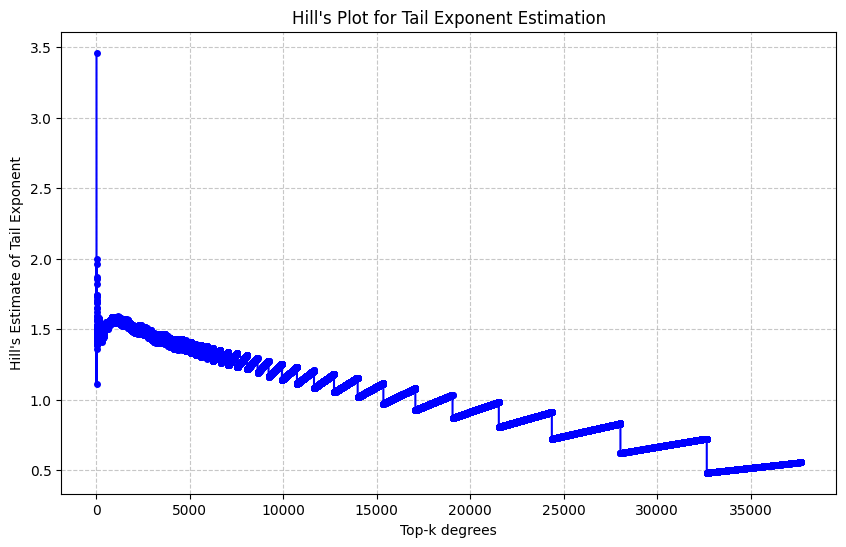

In [9]:
def prepare_graph(file_path):
    # Load edges and remove self-loops and duplicates
    edges = load_graph_from_file(file_path)
    unique_edges = {(min(u, v), max(u, v)) for u, v in edges if u != v}
    
    # Build the graph
    G = nx.Graph()
    G.add_edges_from(unique_edges)
    
    # Extract the largest connected component
    if not nx.is_connected(G):
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()
    
    return G

def hill_plot(file_path):
    G = prepare_graph(file_path)
    
    # Calculate degrees of each vertex
    degrees = np.array([deg for _, deg in G.degree()])
    
    # Filter out degrees greater than zero for meaningful Hill's estimation
    degrees = degrees[degrees > 0]
    
    # Sort degrees in descending order
    sorted_degrees = np.sort(degrees)[::-1]
    
    # Calculate Hill's estimator for various top-k values
    hill_exponents = []
    for k in range(1, len(sorted_degrees)):
        top_k_degrees = sorted_degrees[:k]
        mean_log_ratio = np.mean(np.log(top_k_degrees / sorted_degrees[k]))
        hill_exponent = 1 / mean_log_ratio
        hill_exponents.append(hill_exponent)
    
    # Plotting Hill's plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(sorted_degrees)), hill_exponents, marker='o', markersize=4, linestyle='-', color='b')
    plt.xlabel("Top-k degrees")
    plt.ylabel("Hill's Estimate of Tail Exponent")
    plt.title("Hill's Plot for Tail Exponent Estimation")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Replace 'data.txt' with the path to your file
hill_plot('data.txt')